# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import pandas as pd
import numpy as np

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

** Read in the csv file as a dataframe called df **

In [3]:
df=pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [8]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [12]:
df['zip'].nunique()

104

In [10]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [16]:
df['twp'].nunique()

68

In [17]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [19]:
df['title'].nunique()

110

In [20]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

In [34]:
df['Reason']=df['title'].apply(lambda s:s.split(':')[0])

In [35]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Dayofweek,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,10,thu,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,10,thu,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,2015,12,10,thu,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,10,thu,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,10,thu,EMS


In [30]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** to show the occurance of each department **

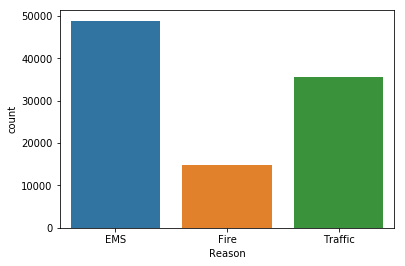

In [33]:
sns.countplot(x='Reason',data=df) 

In [36]:
df['timeStamp'][0]

str

In [37]:
type(df['timeStamp'][0])

str

In [38]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [39]:
s=df.iloc[0,5]

In [41]:
s

'2015-12-10 17:40:00'

In [42]:
type(s)

str

** to convert timestamp column to timestamp format using pd.to_datetime() function

In [6]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [7]:
s=df.iloc[0,5]

In [8]:
s

Timestamp('2015-12-10 17:40:00')

In [9]:
type(s)

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
s.month

12

In [11]:
s.day

10

In [12]:
s.dayofweek

3

** to add three column year, month ,day and Dayofweek to data frame and get the values from timestamp column**

In [13]:
df['Year']=df['timeStamp'].apply(lambda x:x.year)

In [14]:
df['Month']=df['timeStamp'].apply(lambda x:x.month)

In [17]:
df['Day']=df['timeStamp'].apply(lambda x:x.day)

In [84]:
df['Dayofweek']=df['timeStamp'].apply(lambda x:x.dayofweek)

In [87]:
df['Hour']=df['timeStamp'].apply(lambda x:x.hour)

In [86]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Dayofweek,Reason,date,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,10,3,EMS,2015-12-10,<built-in method time of Timestamp object at 0...
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,10,3,EMS,2015-12-10,<built-in method time of Timestamp object at 0...
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,2015,12,10,3,Fire,2015-12-10,<built-in method time of Timestamp object at 0...
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,10,3,EMS,2015-12-10,<built-in method time of Timestamp object at 0...
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,10,3,EMS,2015-12-10,<built-in method time of Timestamp object at 0...


** To change the value of dayweek column with dictionary value **

In [21]:
df['Dayofweek'].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

In [22]:
d={0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'}

In [23]:
df['Dayofweek']=df['Dayofweek'].map(d)

In [25]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,10,thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,10,thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,2015,12,10,thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,10,thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,10,thu


In [26]:
df['Dayofweek'].unique()

array(['thu', 'fri', 'sat', 'sun', 'mon', 'tue', 'wed'], dtype=object)

In [29]:
df['Dayofweek'].value_counts()

tue    15150
wed    14879
fri    14833
mon    14680
thu    14478
sat    13336
sun    12136
Name: Dayofweek, dtype: int64

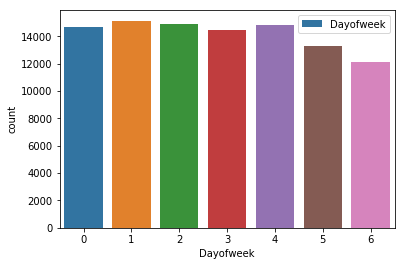

In [107]:
sns.countplot(x='Dayofweek',data=df,label='Dayofweek')
plt.legend()

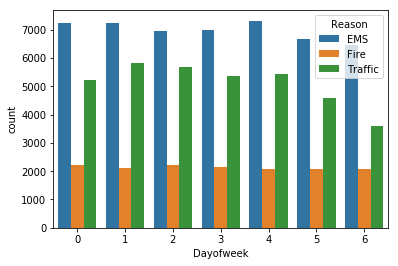

In [90]:
sns.countplot(x='Dayofweek',data=df,hue='Reason')

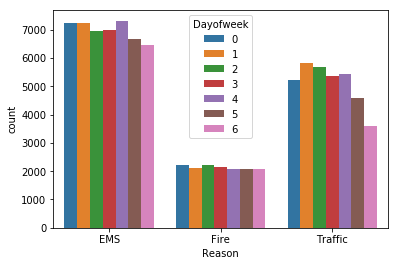

In [91]:
sns.countplot(x='Reason',data=df,hue='Dayofweek')

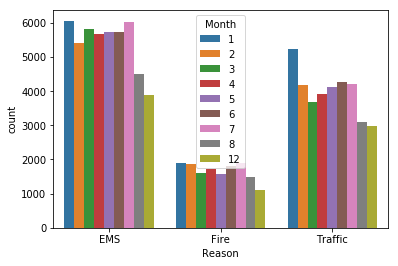

In [92]:
sns.countplot(x='Reason',data=df,hue='Month')

In [93]:
df.groupby('Month').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Day,Dayofweek,Reason,date,Hour
Month,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969,7969


In [94]:
df.groupby('Year').nunique()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Dayofweek,Reason,date,Hour
Year,,,,,,,,,,,,,,,,
2015,3784,3783,7958,82,82,5966,67,4553,1,1,1,22,7,3,22,24
2016,14180,14182,91497,101,109,66611,68,21111,1,1,8,31,7,3,237,24


Did you notice something strange about the Plot?

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [95]:
df.groupby('Month').count()['lat']

Month
1     13205
2     11467
3     11101
4     11326
5     11423
6     11786
7     12137
8      9078
12     7969
Name: lat, dtype: int64

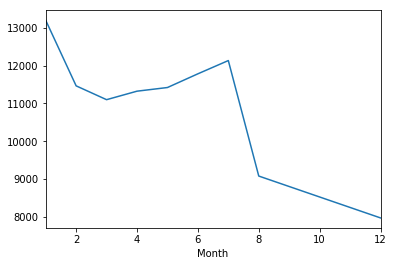

In [96]:
df.groupby('Month').count()['lat'].plot()

In [97]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Dayofweek,Reason,date,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,10,3,EMS,2015-12-10,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,10,3,EMS,2015-12-10,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,2015,12,10,3,Fire,2015-12-10,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,10,3,EMS,2015-12-10,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,10,3,EMS,2015-12-10,17


In [98]:
s=df['timeStamp'][0]

In [99]:
s.date()

datetime.date(2015, 12, 10)

In [100]:
df['date']=df['timeStamp'].apply(lambda s:s.date())

In [101]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Dayofweek,Reason,date,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,10,3,EMS,2015-12-10,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,10,3,EMS,2015-12-10,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,2015,12,10,3,Fire,2015-12-10,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,10,3,EMS,2015-12-10,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,10,3,EMS,2015-12-10,17


In [102]:
df.groupby('date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Dayofweek,Reason,Hour
date,,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447,447
2015-12-15,421,421,421,380,421,421,420,419,421,421,421,421,421,421,421
2015-12-16,377,377,377,343,377,377,377,376,377,377,377,377,377,377,377
2015-12-17,388,388,388,336,388,388,388,387,388,388,388,388,388,388,388
2015-12-18,346,346,346,306,346,346,346,346,346,346,346,346,346,346,346


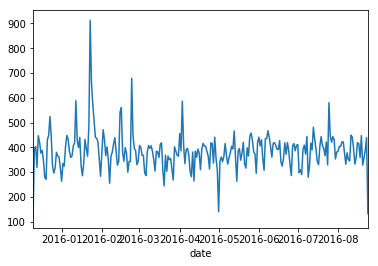

In [103]:
df.groupby('date').count()['lat'].plot()

In [62]:
df['date'].value_counts()

2016-01-23    913
2016-02-24    679
2016-01-24    662
2016-01-12    588
2016-04-03    586
2016-07-25    580
2016-01-25    575
2016-02-16    560
2016-02-15    541
2015-12-23    524
2016-01-26    505
2016-01-22    486
2016-07-13    481
2016-02-02    471
2016-06-08    467
2016-05-13    466
2016-05-26    458
2016-04-01    456
2016-08-11    449
2016-01-05    448
2015-12-22    448
2016-02-25    447
2016-08-19    447
2015-12-14    447
2016-07-26    446
2015-12-24    445
2016-07-08    444
2016-05-25    444
2016-07-19    443
2016-07-28    443
             ... 
2016-07-03    309
2016-06-05    307
2016-03-19    306
2016-04-30    306
2016-03-13    304
2016-03-22    303
2016-04-09    302
2016-02-21    300
2016-07-02    298
2016-03-05    297
2015-12-26    296
2016-05-30    295
2016-07-04    290
2016-06-26    286
2016-03-06    286
2016-01-17    285
2016-01-31    283
2016-04-10    281
2015-12-19    279
2016-07-09    279
2015-12-20    271
2016-03-27    268
2016-04-12    264
2016-01-01    263
2016-05-15

In [66]:
df[df['Reason']=='EMS']['date'].value_counts()

2016-01-24    250
2016-01-15    239
2016-02-02    232
2016-04-01    231
2016-06-21    228
2016-02-10    228
2016-05-27    226
2015-12-21    225
2016-06-06    224
2016-05-26    224
2016-01-19    224
2016-07-19    224
2015-12-14    222
2016-06-17    221
2016-04-13    220
2016-04-11    219
2016-08-23    218
2016-01-25    218
2016-07-11    217
2015-12-28    216
2016-07-29    216
2016-07-27    215
2016-07-08    215
2016-08-02    215
2016-08-13    214
2016-07-01    214
2016-05-13    214
2016-08-16    213
2016-03-01    213
2016-03-10    211
             ... 
2016-04-17    166
2016-08-21    165
2016-04-30    165
2016-04-05    164
2015-12-18    164
2016-08-10    164
2016-06-08    164
2016-02-23    163
2016-07-02    162
2016-04-09    162
2016-07-04    162
2016-03-27    162
2016-02-07    159
2016-02-14    159
2016-08-20    159
2016-06-26    159
2016-03-20    159
2016-04-03    158
2016-02-13    158
2016-03-05    156
2016-08-18    152
2016-06-05    148
2015-12-20    148
2016-03-26    146
2016-05-15

In [67]:
df[df['Reason']=='Fire']['date'].value_counts()

2016-02-24    173
2016-01-24    161
2016-07-25    159
2016-01-23    159
2016-04-03    147
2016-02-16    120
2016-02-15     94
2016-02-25     87
2016-08-12     87
2015-12-24     84
2016-06-08     84
2016-06-12     82
2016-02-14     81
2016-06-09     81
2016-01-25     80
2016-08-11     79
2016-07-23     77
2016-01-05     77
2016-01-06     77
2016-02-03     77
2016-08-13     76
2016-06-03     75
2016-05-28     75
2016-08-01     75
2016-04-19     73
2016-04-20     72
2016-01-07     71
2016-03-29     71
2016-05-26     71
2016-07-05     71
             ... 
2016-05-02     42
2016-03-04     41
2016-03-13     41
2016-03-19     41
2016-03-05     40
2015-12-31     39
2016-05-12     39
2016-06-18     39
2016-03-03     39
2015-12-14     39
2016-05-18     38
2016-01-17     38
2015-12-27     38
2016-03-27     38
2016-01-31     37
2016-04-11     37
2016-02-07     37
2016-01-02     36
2015-12-26     36
2016-03-20     35
2016-05-15     35
2015-12-18     34
2016-01-01     34
2016-01-16     33
2016-04-10

In [70]:
df[df['Reason']=='Traffic']['date'].value_counts()

2016-01-23    557
2016-01-12    324
2016-02-24    309
2016-04-03    281
2016-01-25    277
2015-12-23    277
2016-01-24    251
2016-01-22    247
2016-01-26    244
2016-02-15    239
2016-02-16    230
2016-07-25    223
2016-06-08    219
2016-07-13    212
2015-12-22    196
2016-05-06    193
2016-05-31    191
2016-01-27    189
2016-01-28    188
2016-05-13    186
2015-12-14    186
2016-07-26    185
2016-06-01    183
2015-12-15    183
2016-01-13    179
2016-02-03    179
2016-06-07    179
2016-02-11    177
2016-07-28    177
2016-06-03    177
             ... 
2016-03-22     89
2016-06-19     89
2016-03-12     88
2016-08-14     86
2016-05-15     84
2016-08-07     84
2016-07-02     83
2016-01-17     81
2016-05-30     80
2016-03-19     79
2016-01-31     78
2015-12-13     78
2016-07-03     78
2015-12-20     78
2016-06-26     77
2015-12-25     76
2016-07-04     75
2016-02-21     73
2016-03-06     73
2016-04-10     70
2016-03-13     68
2016-03-27     68
2016-07-09     63
2016-04-24     62
2016-02-07

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

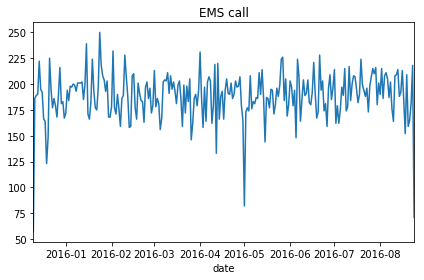

In [81]:
df[df['Reason']=='EMS'].groupby('date').count()['lat'].plot()
plt.title('EMS call')
plt.tight_layout()

Text(0.5, 1.0, 'Fire')

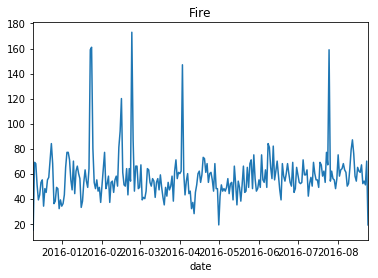

In [82]:
df[df['Reason']=='Fire'].groupby('date').count()['lat'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'Traffic')

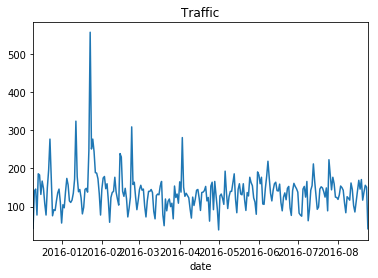

In [83]:
df[df['Reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.title('Traffic')

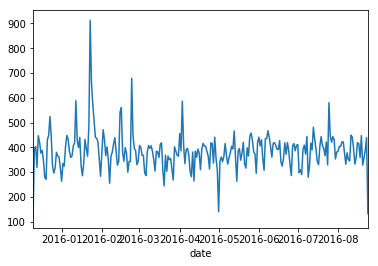

In [79]:
df.groupby('date').count()['lat'].plot()

In [108]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Dayofweek,Reason,date,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,10,3,EMS,2015-12-10,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,10,3,EMS,2015-12-10,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,2015,12,10,3,Fire,2015-12-10,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,10,3,EMS,2015-12-10,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,10,3,EMS,2015-12-10,17


** Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an unstack method. **

In [138]:
dayhour=df.groupby(['Dayofweek','Hour']).count()['Reason'].unstack()

In [139]:
dayhour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Dayofweek,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
5,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
6,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330


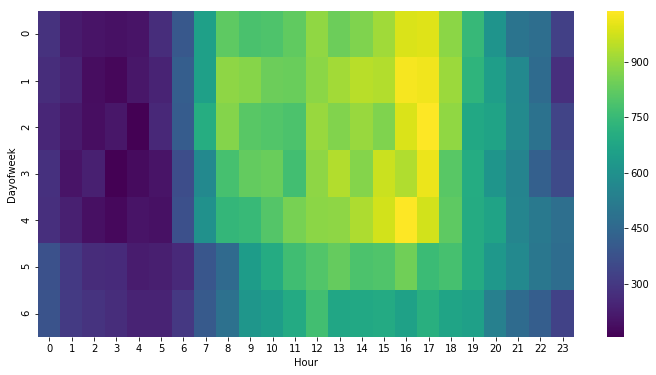

In [129]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour,cmap='viridis')

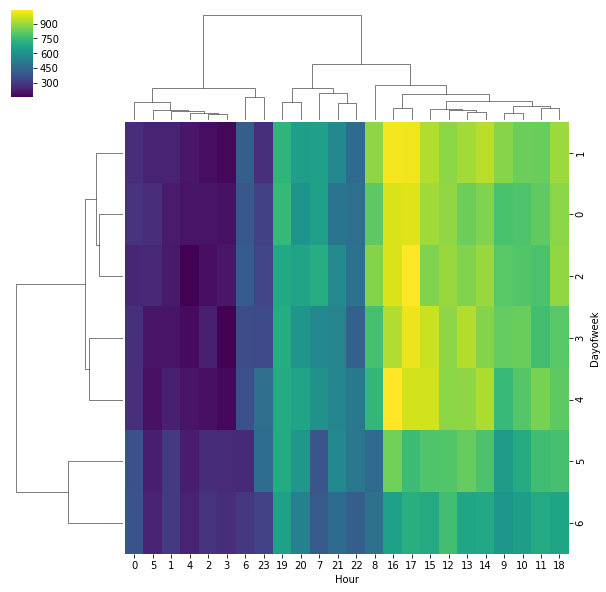

In [133]:
sns.clustermap(dayhour,cmap='viridis')

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

** What is the most common Reason for a 911 call based off of this new column? **

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

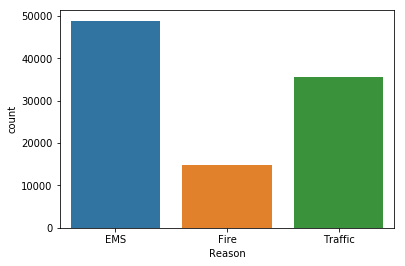

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


pandas._libs.tslibs.timestamps.Timestamp

Timestamp('2015-12-10 17:40:00')

datetime.date(2015, 12, 10)

12

2015

In [37]:
s.day

10

In [38]:
s.dayofweek

3

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [28]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [41]:
df['year'] = df['timeStamp'].apply(lambda x:x.year)
df['month'] = df['timeStamp'].apply(lambda x:x.month)
df['date'] = df['timeStamp'].apply(lambda x:x.date())
df['day'] = df['timeStamp'].apply(lambda x:x.day)
df['hour'] = df['timeStamp'].apply(lambda x:x.hour)
df['dayofweek']  = df['timeStamp'].apply(lambda x:x.dayofweek)

In [45]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,year,month,date,day,hour,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,12,2015-12-10,10,17,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,12,2015-12-10,10,17,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015,12,2015-12-10,10,17,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,12,2015-12-10,10,17,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,12,2015-12-10,10,17,Thu


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [43]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [44]:
df['dayofweek'] = df['dayofweek'].map(dmap)

In [46]:
df['dayofweek'].unique()

array(['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'], dtype=object)

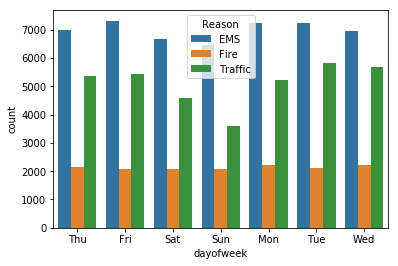

In [53]:
sns.countplot(x = 'dayofweek', data = df, hue = 'Reason')

Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Sun    12136
Name: Day of Week, dtype: int64

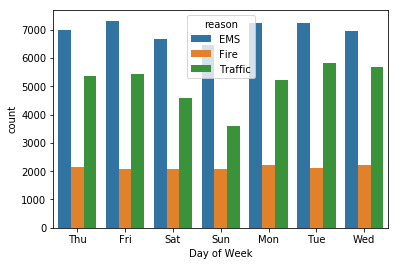

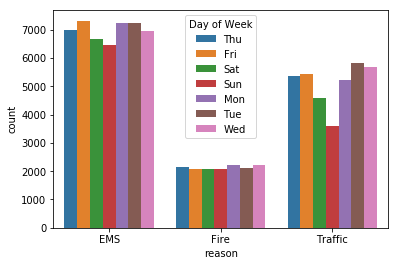

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

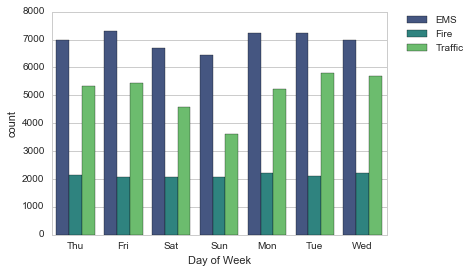

**Now do the same for Month:**

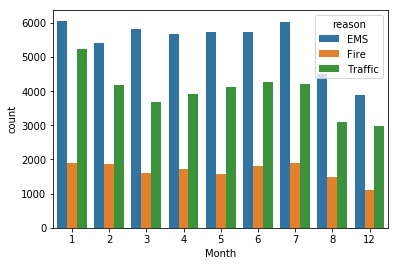

In [43]:
sns.countplot(x = 'Month', data = df, hue = 'reason')

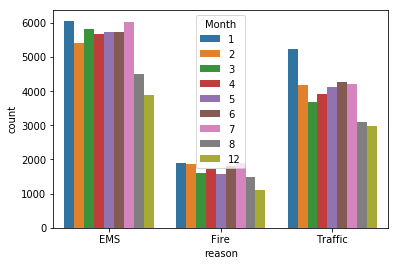

In [44]:
sns.countplot(x = 'reason', data = df, hue = 'Month')

In [45]:
df['year'].unique()

array([2015, 2016])

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [47]:
bymonth =df.groupby('Month').count()

In [51]:
bymonth['title']

Month
1     13205
2     11467
3     11101
4     11326
5     11423
6     11786
7     12137
8      9078
12     7969
Name: title, dtype: int64

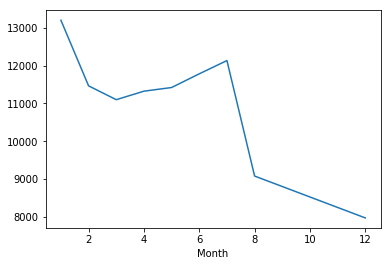

In [50]:
bymonth['title'].plot()

In [53]:
d = df.iloc[0,5]

In [55]:
d.date()

datetime.date(2015, 12, 10)

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

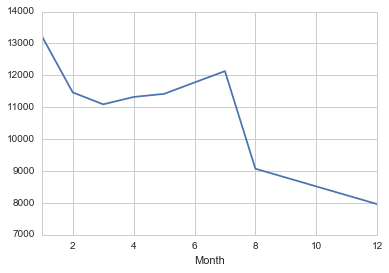

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

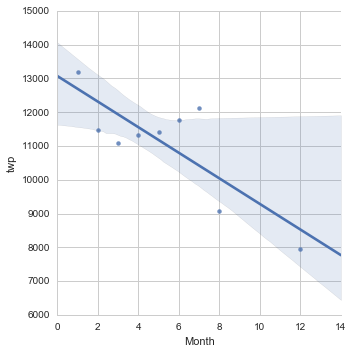

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [ ]:
df['date'] = df['timeStamp'].apply(lambda x:x.date())

In [60]:
bydate = df.groupby('date').count()

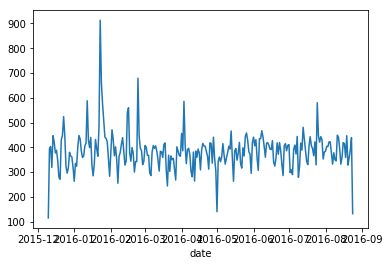

In [67]:
bydate['title'].plot()

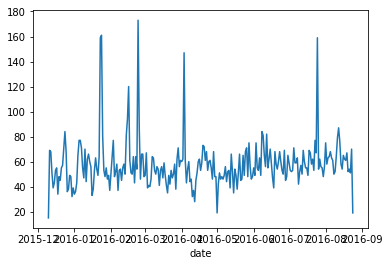

In [74]:
df[df['reason']=='Fire'].groupby('date').count()['title'].plot()

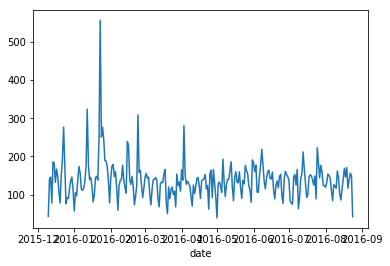

In [75]:
df[df['reason']=='Traffic'].groupby('date').count()['title'].plot()

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

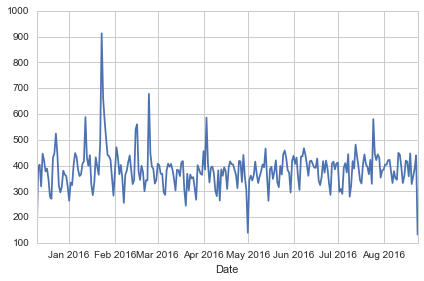

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

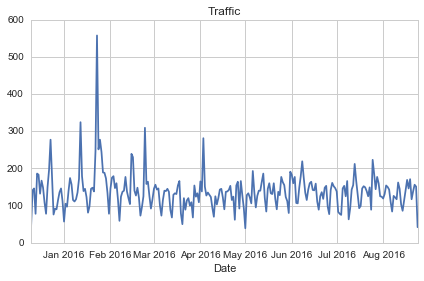

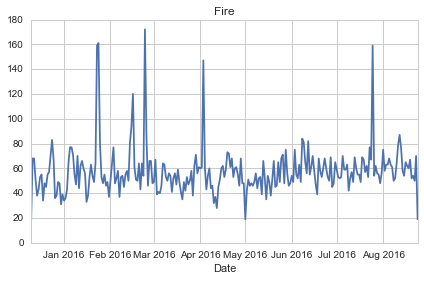

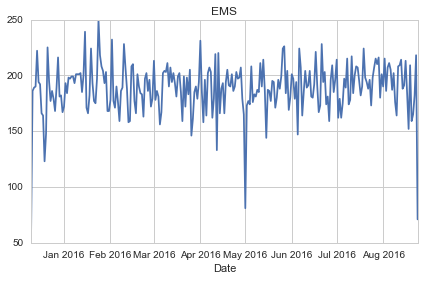

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

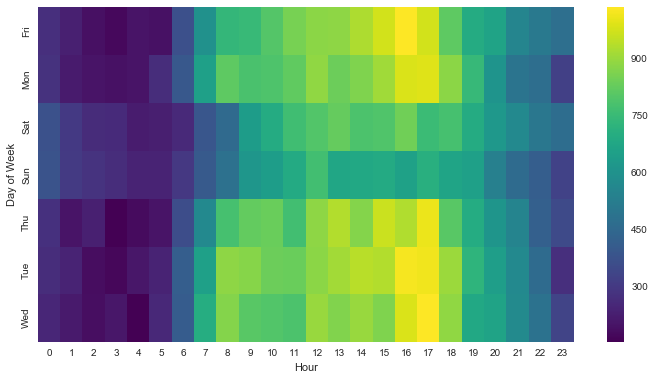

** Now create a clustermap using this DataFrame. **

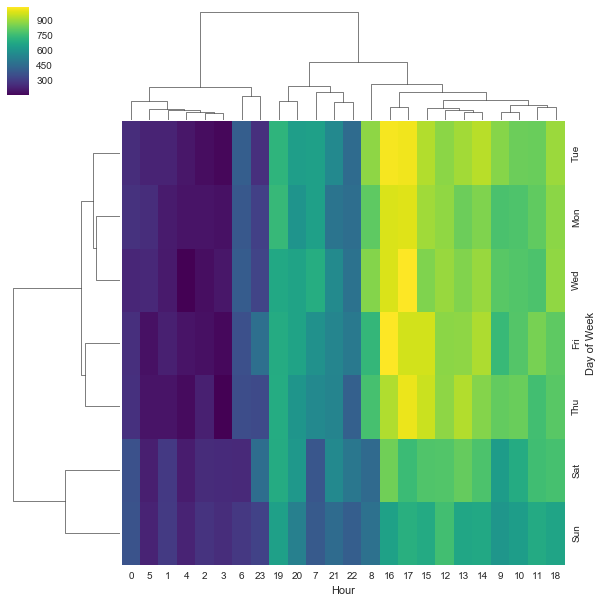

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


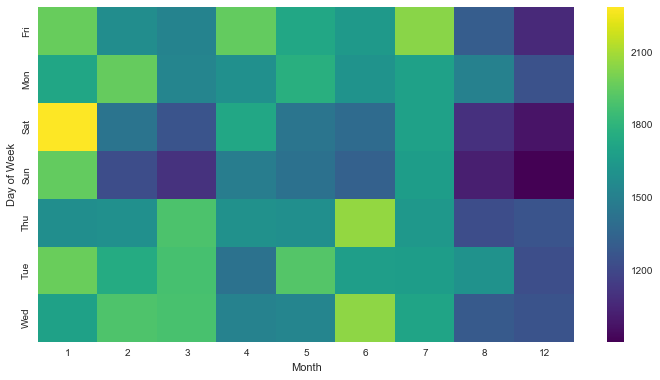

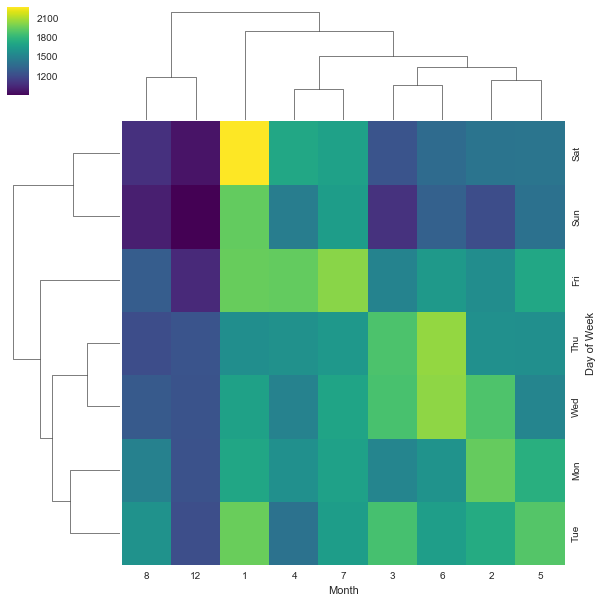

**Continue exploring the Data!**
# Great Job!